<a href="https://colab.research.google.com/github/Fasiloc/Deep_learning_learn-repo/blob/main/Mini%20Project/Mini_Project_Musical_instrument_classification_Fasil_oc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np 
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from tensorflow.keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
# loading up datasets
train_data_dir = '/content/drive/MyDrive/Deep Learning Miniproject/musical_instruments/train'

# Data Augmenation
datagen = ImageDataGenerator(rescale=1. / 255)

generator_train = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(224, 224), 
   batch_size=50, 
   class_mode='categorical', 
   shuffle=False) 

# splitting train and test data
train_data,test_data,train_labels,test_labels = train_test_split(generator_train[0][0],generator_train[0][1],
                                                                 test_size=0.2,random_state=42,stratify=generator_train[0][1]
                                                                 )

Found 500 images belonging to 10 classes.


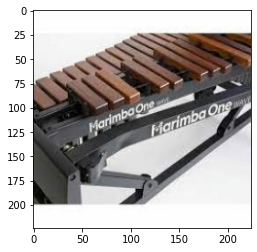

In [ ]:
plt.imshow(train_data[1])


In [ ]:
#Creating Model 
model = Sequential() 

model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3),padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten()) 
 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# fitting data
history = model.fit(train_data, train_labels, 
   epochs=5,
   batch_size=50,
   validation_data=(test_data, test_labels))

test_loss , test_accuracy = model.evaluate(test_data, test_labels)

print(" accuracy: {:.2f}%".format(test_accuracy * 100)) 
print(" Loss: {}".format(test_loss)) 

Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 1.7160 - acc: 0.9000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 224ms/step - loss: 0.0010 - acc: 1.0000
 accuracy: 100.00%
 Loss: 0.001014075125567615


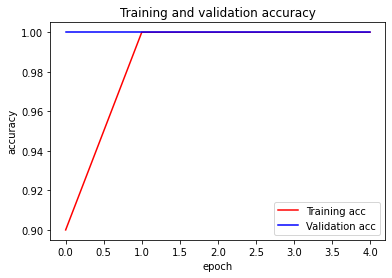

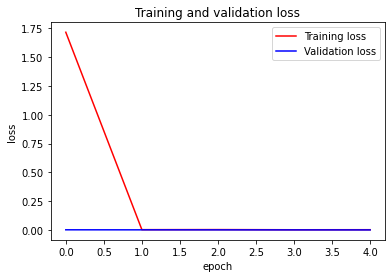

In [ ]:
# Vissualizing training and validation datas
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()